In [399]:
import csv
import numpy as numpy
import matplotlib.pyplot as plt
import os as os
import datetime

sensor = 2
files = os.listdir('D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps')
file_start = 'S' + str(sensor) + '_'
files_s = [file for file in files if file[:3] == file_start ]
print(files_s)
#file_name = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/S1_5V_1A.txt'

voltages=[]
currents=[]
cur_max=[]
cur_min=[]
volt_max=[]
volt_min=[]
set_currents = []
for file_name in files_s:
    current=[]
    file_name = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/' + file_name
    file_time = os.path.getmtime(file_name)
    indices = [i for i, c in enumerate(file_name) if c == 'A']
    end_current = indices[-1]
    indices = [i for i, c in enumerate(file_name) if c == '_']
    start_current = indices[-1]
    set_currents.append(int(file_name[start_current+1:end_current]))
    with open(file_name, newline='') as csvfile:
        data = []
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            data.append(row)
    data = numpy.array(data[1:])
    volt = [float(dat) for dat in data.transpose()[3+1+sensor*3].flatten()]
    current = [float(dat) for dat in data.transpose()[3+sensor*3].flatten()]
    time = [float(dat) for dat in data.transpose()[1].flatten()]
    dtime = [float(dat) for dat in data.transpose()[2].flatten()]
    voltages.append(numpy.mean(volt))
    volt_max.append(numpy.max(volt))
    volt_min.append(numpy.min(volt))
    currents.append(numpy.mean(current))
    cur_max.append(numpy.max(current))
    cur_min.append(numpy.min(current))


order = numpy.argsort(set_currents)
currents = [ currents[this] for this in order]
voltages = [ voltages[this] for this in order]
cur_max = [ cur_max[this] for this in order]
cur_min = [ cur_min[this] for this in order]
volt_max = [ volt_max[this] for this in order]
volt_min = [ volt_min[this] for this in order]
set_currents = [ set_currents[this] for this in order]

['S2_10V_0A.txt', 'S2_10V_10A.txt', 'S2_10V_1A.txt', 'S2_10V_2A.txt', 'S2_10V_3A.txt', 'S2_10V_4A.txt', 'S2_10V_5A.txt', 'S2_10V_6A.txt', 'S2_10V_7A.txt', 'S2_10V_8A.txt', 'S2_10V_9A.txt']


In [350]:
currents = currents[:-1]
voltages = voltages[:-1]
set_currents = set_currents[:-1]

In [351]:
plt.figure(1)
plt.title(f"Voltage drop for sensor {sensor}")
plt.plot(set_currents, voltages)
plt.ylabel("Vsens (V)")
plt.xlabel("Load current (A)")
plt.grid(True)
plt.show()

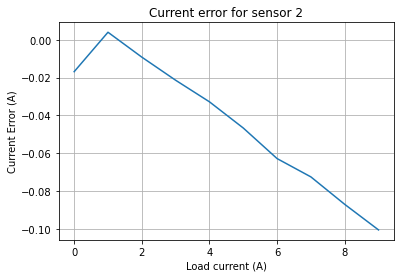

In [352]:
current_error = [currents[cnt] - set_currents[cnt] for cnt in range(len(set_currents))]
plt.figure(2)
plt.title(f"Current error for sensor {sensor}")
plt.plot(set_currents, current_error)
plt.xlabel("Load current (A)")
plt.ylabel("Current Error (A)")
plt.grid(True)
plt.show()

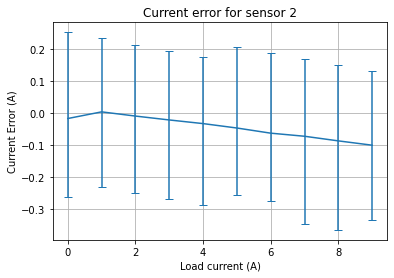

In [353]:
err_min = numpy.abs([cur_min[cnt] - currents[cnt] for cnt in range(len(set_currents))])
err_max = [cur_max[cnt] - currents[cnt] for cnt in range(len(set_currents))]
current_error = [currents[cnt] - set_currents[cnt] for cnt in range(len(set_currents))]
err=[err_min]+[err_max]
plt.figure(2)
plt.title(f"Current error for sensor {sensor}")
plt.errorbar(set_currents, current_error, yerr=err, capsize=4)
plt.xlabel("Load current (A)")
plt.ylabel("Current Error (A)")
plt.grid(True)
plt.show()

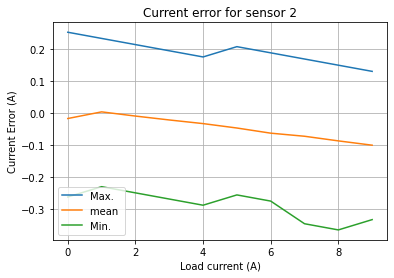

In [354]:
err_min = [cur_min[cnt] - set_currents[cnt] for cnt in range(len(set_currents))]
err_max = [cur_max[cnt] - set_currents[cnt] for cnt in range(len(set_currents))]
current_error = [currents[cnt] - set_currents[cnt] for cnt in range(len(set_currents))]
plt.figure(2)
plt.title(f"Current error for sensor {sensor}")
plt.plot(set_currents, err_max, label="Max.")
plt.plot(set_currents, current_error, label="mean ")
plt.plot(set_currents, err_min, label="Min.")
plt.legend()
plt.xlabel("Load current (A)")
plt.ylabel("Current Error (A)")
plt.grid(True)
plt.show()

In [355]:
err_min = numpy.abs([volt_min[cnt] - voltages[cnt] for cnt in range(len(set_currents))])
err_max = [volt_max[cnt] - voltages[cnt] for cnt in range(len(set_currents))]
err=[err_min]+[err_max]
plt.figure(2)
plt.title(f"Voltage sensor {sensor}")
plt.errorbar(set_currents, voltages, yerr=err, capsize=4)
plt.xlabel("Load current (A)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.show()

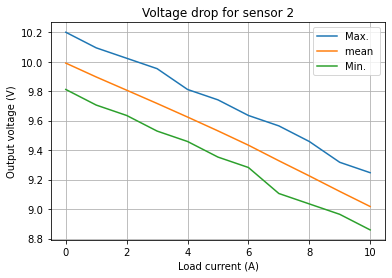

In [359]:
plt.figure(3)
plt.title(f"Voltage drop for sensor {sensor}")
plt.plot(set_currents, volt_max, label="Max.")
plt.plot(set_currents, voltages, label="mean ")
plt.plot(set_currents, volt_min, label="Min.")
plt.legend()
plt.xlabel("Load current (A)")
plt.ylabel("Output voltage (V)")
plt.grid(True)
plt.show()

In [357]:
print(datetime.datetime.fromtimestamp(file_time))

2022-11-02 16:05:14


In [360]:
def inter_pol_series(time, data):
    diff_time = [(time[n+1] - time[n]) for n in range(len(time)-1)]
    min_time_step = numpy.min(diff_time)
    new_time = numpy.arange(time[0],time[-1],min_time_step)
    new_data = numpy.interp(new_time, time, data)
    return new_time, new_data

In [400]:
points = 1024
if True:
    time_new, current_new = inter_pol_series(time, current)
else:
    time_new = time
    current_new = current
sample_frequency = [1/(time_new[n+1] - time_new[n]) for n in range(len(time_new)-1)]
fs = numpy.mean(sample_frequency)
block = int(len(current_new)/points)
rshape_current = numpy.resize(current_new[:block*points],(points,block))
f_current = numpy.mean(numpy.fft.fft2((rshape_current)),1)
fas = [n*fs/points for n in range(points)]
plt.figure(4)
plt.title(f"Spectrum of the current measurement sensor:{sensor}")
plt.plot(fas, 10*numpy.log10(abs(f_current)), label="Max.")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Current (dB)")
plt.xlim([0,fs/2])
plt.grid(True)
plt.show()
snr = 10*numpy.log10(numpy.abs(f_current[0]/numpy.sum(f_current[1:len(f_volt)//2])))
int_noise = 10*numpy.log10(numpy.abs(numpy.sum(f_current[1:])))
print(f"FFT points {points} Averagin {block}" )
print(f"SNR Current sensor {snr:5.2f} dB, integrated noise {int_noise:4.2f} dB" )

FFT points 1024 Averagin 293
SNR Current sensor 22.93 dB, integrated noise 18.89 dB


FFT points: 1024, blocks 293, fs_mean 100000.00


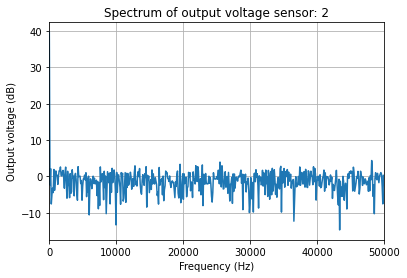

SNR voltage sensor 26.55 dB , integrated noise 11.51 dB


In [401]:
points = 1024
if True:
    time_new, volt_new = inter_pol_series(time, volt)
else:
    time_new = time
    volt_new = volt

sample_frequency = [1/(time_new[n+1] - time_new[n]) for n in range(len(time_new)-1)]
fs = numpy.mean(sample_frequency)
block = int(len(volt_new)/points)
rshape_volt = numpy.resize(volt_new[:block*points],(points,block))
print(f"FFT points: {points}, blocks {block}, fs_mean {fs:4.2f}")
f_volt = numpy.mean(numpy.fft.fft2((rshape_volt)),1)
fas = [n*fs/points for n in range(points)]
plt.figure(4)
plt.title(f"Spectrum of output voltage sensor: {sensor}")
plt.plot(fas, 10*numpy.log10(abs(f_volt)), label="Max.")
#plt.plot(current, label="Max.")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output voltage (dB)")
plt.xlim([0,fs/2])
plt.grid(True)
plt.show()
snr = 10*numpy.log10(numpy.abs(f_volt[0]/numpy.sum(f_volt[1:len(f_volt)//2])))
int_noise = 10*numpy.log10(numpy.abs(numpy.sum(f_volt[1:])))
print(f"SNR voltage sensor {snr:5.2f} dB , integrated noise {int_noise:4.2f} dB" )

In [272]:
import scipy.signal as signal
def lomb_data(data, time, points=8192, f_high = 8000):
    freq = [n*f_high/points for n in range(1,points+1,1)]
    f_data = signal.lombscargle(time[:points], data[:points], freq, normalize=True)
    return freq, f_data

In [365]:
str_offset=8192
freq, f_volt = lomb_data(volt[str_offset:], time[str_offset:], points=16384, f_high = 8000)
plt.figure(4)
plt.title(f"Spectrum of output voltage sensor: {sensor}")
plt.plot(freq, 10*numpy.log10(abs(f_volt)), label="Max.")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output voltage (dB)")
plt.grid(True)
plt.xlim([0,8000])
plt.ylim([-80,0])
plt.show()

In [367]:
f_data = []
freq, f_current = lomb_data(current[str_offset:], time[str_offset:], points=16384, f_high = 8000)
print(numpy.max(f_current))
plt.figure(5)
plt.title(f"Spectrum of current sensor {sensor}")
plt.plot(freq, 10*numpy.log10(abs(f_current)), label="Max.")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Measured current (dB)")
plt.grid(True)
plt.xlim([0,8000])
plt.ylim([-80,0])
plt.show()

0.9998602583925038


In [169]:
def count_values(items):
    item_list=[]
    counts={}
    for one_item in items:
        item = str(one_item)
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
            item_list.append(item)
    item_list = numpy.sort(item_list)
    hist=[]
    for item in item_list:
        hist.append(counts[item])
    return hist, item_list 

hist, item_list = count_values(volt)
print(hist)

[1, 1, 1, 3, 2, 3, 3, 6, 10, 10, 19, 27, 28, 43, 63, 85, 115, 184, 274, 510, 1184, 2882, 6446, 10183, 11019, 7721, 3751, 1562, 555, 174, 75, 23, 11, 9, 2, 1]


In [380]:
hist, item_list = count_values(volt)
plt.figure(6)
plt.bar(item_list, hist)
plt.title(f"Histogram measured output voltages sensor {sensor}")
plt.xlabel("Measured voltage values")
plt.ylabel("Number of occurance")
plt.grid(True)
plt.show()

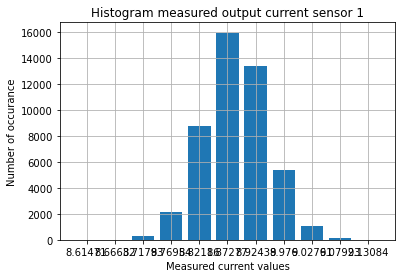

In [381]:
hist, item_list = count_values(current)
plt.figure(6)
plt.bar(item_list, hist)
plt.xlabel("Measured current values")
plt.ylabel("Number of occurance")
plt.grid(True)
plt.title(f"Histogram measured output current sensor {sensor}")
plt.show()

In [58]:
sample_frequency = [1/(time[n+1] - time[n]) for n in range(len(time)-1)]
print(sample_frequency[:10])
print(numpy.mean(sample_frequency))

[3224.2463324197975, 1578.8310335027945, 3905.334687182688, 5576.3118273573955, 6073.858114674435, 3435.8357670503333, 5889.281507656069, 6159.91129727732, 5956.635692161067, 5974.07252524046]
18706.3409842729


## 24 Hour measurement(s)

In [264]:
#file_location = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/5A_24hours/'
file_location = 'M:/VIEWlogic/Projects/PowerSensor/Measurements/Sweep2/'
files = os.listdir(file_location)
sensor = 2
file_start = 'S' + str(sensor) + '_'
files_s = [file for file in files if file[:3] == file_start ]
print(files_s)
#file_name = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/S1_5V_1A.txt'

voltages=[]
currents=[]
cur_max=[]
cur_min=[]
volt_max=[]
volt_min=[]
time_scale=[]
set_currents = []
for file_name in files_s:
    current=[]
    file_name = file_location + file_name
    file_time = os.path.getmtime(file_name)
    indices = [i for i, c in enumerate(file_name) if c == 'A']
    end_current = indices[-1]
    indices = [i for i, c in enumerate(file_name) if c == '_']
    start_current = indices[-2]
    set_currents.append(int(file_name[start_current+1:end_current]))
    with open(file_name, newline='') as csvfile:
        data = []
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            data.append(row)
    data = numpy.array(data[1:])
    sen = 3
    volt = [float(dat) for dat in data.transpose()[3+1+sen*3].flatten()]
    current = [float(dat) for dat in data.transpose()[3+sen*3].flatten()]
    time_scale.append(os.path.getmtime(file_name))
    voltages.append(numpy.mean(volt))
    volt_max.append(numpy.max(volt))
    volt_min.append(numpy.min(volt))
    currents.append(numpy.mean(current))
    cur_max.append(numpy.max(current))
    cur_min.append(numpy.min(current))


order = numpy.argsort(time_scale)
currents = [ currents[this] for this in order]
voltages = [ voltages[this] for this in order]
cur_max = [ cur_max[this] for this in order]
cur_min = [ cur_min[this] for this in order]
volt_max = [ volt_max[this] for this in order]
volt_min = [ volt_min[this] for this in order]
set_currents = [ set_currents[this] for this in order]
time_scale = [time_scale[this] for this in order]

['S2_10V_5A_1.csv', 'S2_10V_5A_10.csv', 'S2_10V_5A_100.csv', 'S2_10V_5A_101.csv', 'S2_10V_5A_102.csv', 'S2_10V_5A_103.csv', 'S2_10V_5A_104.csv', 'S2_10V_5A_105.csv', 'S2_10V_5A_106.csv', 'S2_10V_5A_107.csv', 'S2_10V_5A_108.csv', 'S2_10V_5A_109.csv', 'S2_10V_5A_11.csv', 'S2_10V_5A_110.csv', 'S2_10V_5A_111.csv', 'S2_10V_5A_112.csv', 'S2_10V_5A_113.csv', 'S2_10V_5A_114.csv', 'S2_10V_5A_115.csv', 'S2_10V_5A_116.csv', 'S2_10V_5A_117.csv', 'S2_10V_5A_118.csv', 'S2_10V_5A_119.csv', 'S2_10V_5A_12.csv', 'S2_10V_5A_120.csv', 'S2_10V_5A_121.csv', 'S2_10V_5A_122.csv', 'S2_10V_5A_123.csv', 'S2_10V_5A_124.csv', 'S2_10V_5A_125.csv', 'S2_10V_5A_126.csv', 'S2_10V_5A_127.csv', 'S2_10V_5A_128.csv', 'S2_10V_5A_129.csv', 'S2_10V_5A_13.csv', 'S2_10V_5A_130.csv', 'S2_10V_5A_131.csv', 'S2_10V_5A_132.csv', 'S2_10V_5A_133.csv', 'S2_10V_5A_134.csv', 'S2_10V_5A_135.csv', 'S2_10V_5A_136.csv', 'S2_10V_5A_137.csv', 'S2_10V_5A_138.csv', 'S2_10V_5A_139.csv', 'S2_10V_5A_14.csv', 'S2_10V_5A_140.csv', 'S2_10V_5A_141.csv'

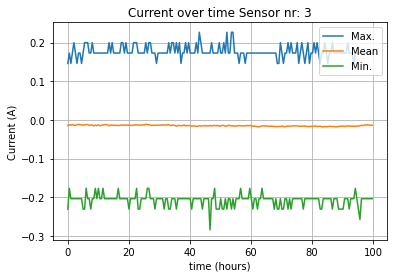

In [266]:
#xas = [(time_scale[cnt]-numpy.min(time_scale)) for cnt in range(len(time_scale))]
xas= [ (time_scale[cnt]-time_scale[0])/(60*60) for cnt in range(len(time_scale))]
plt.figure(2)
plt.title(f"Current over time Sensor nr: {sen}")
plt.plot(xas, cur_max, label='Max.')
plt.plot(xas, currents, label='Mean')
plt.plot(xas, cur_min, label='Min.')
plt.legend()
plt.xlabel("time (hours)")
plt.ylabel("Current (A)")
#plt.ylim([4.5,5.5])
plt.grid(True)
plt.show()

In [266]:
print("{:02x}".format(1))

01
